<img src="https://i.imgur.com/FoKB5Z5.png" align="left" width="300" height="250" title="source: imgur.com" /></a>

## Program Code: J620-002-4:2020 

## Program Name: FRONT-END SOFTWARE DEVELOPMENT

## Title : Exe25 - k-Means Exercise

#### Name: Phua Yan Han

#### IC Number: 050824070059

#### Date :

#### Introduction : 



#### Conclusion :






# Exercise 1: Build and Plot k-Means


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Step 1:** create blobs with the size of 500, and center of 3

In [2]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=500, centers=3, random_state=0)

**Step 2:** Plot the distribution of the blobs

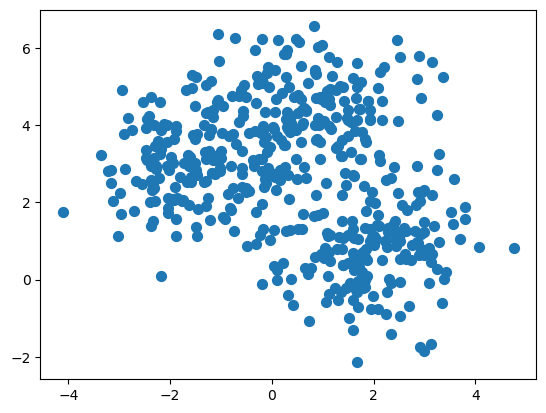

In [3]:
plt.scatter(X[:, 0], X[:, 1], s=50);

**Step 3:** Use K-means, find the centers of these clusters

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

C:\Users\Asus\anaconda3\envs\python-dscourse\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\anaconda3\envs\python-dscourse\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


**Step 4:** Plot the blobs with the found centers

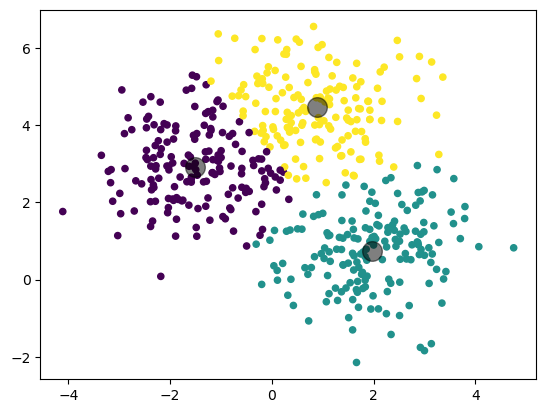

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Additional/Optional:

Step 5: How can you find out the automatically assigned "labels" in the produced clusters?

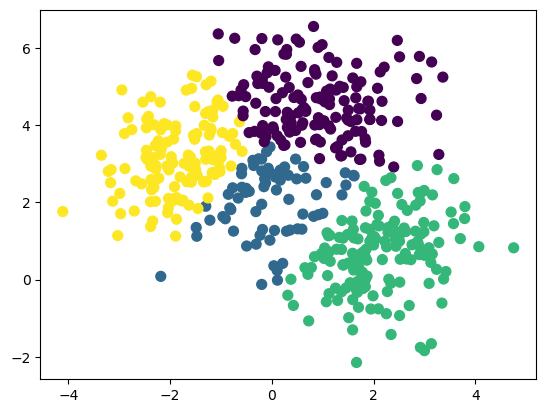

In [6]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X,n_clusters,rseed=2):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        labels = pairwise_distances_argmin(X,centers)
        
        new_centers = np.array([X[labels==i].mean(0) for i in range(n_clusters)])
        
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers,labels
centers,labels = find_clusters(X,4)
plt.scatter(X[:,0],X[:,1],c=labels,s=50,cmap='viridis')

Step 6: How about classes? How to find out where there are classes.

C:\Users\Asus\anaconda3\envs\python-dscourse\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\anaconda3\envs\python-dscourse\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


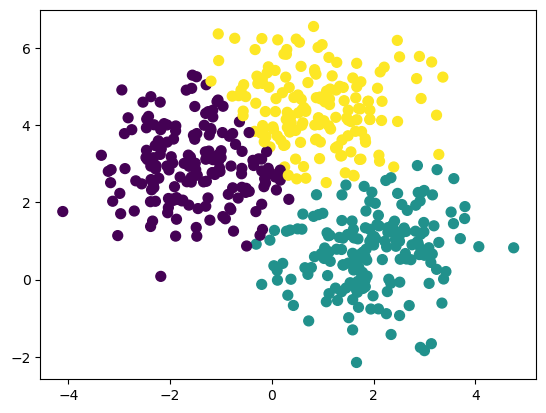

In [7]:
labels = KMeans(3,random_state=0).fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=labels,s=50,cmap='viridis')

# Exercise 2: k-Means with the Iris dataset


**Step 1:** Load the iris dataset from sklearn and other necessary libraries

In [8]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
iris = datasets.load_iris()

**Step 2:** Set the training and target data as X and y respectively. Display the targets.

In [9]:
X = iris.data
y = iris.target

Introducing - *the Elbow Method:*
A technique to allow you to identify the best K

General idea: iterate the creation of k-Means clusters with increasing sizes, and record down the value of kmeans.inertia_ (inertia_: Sum of squared distances of samples to their closest cluster center.)

**Step 3:** create a list named wcss and store the inertia values for a selected range of ks.

In [10]:
wcss = []  # Within-cluster sum of squares (inertia) for different K values

# Define a range of K values to try
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\Asus\anaconda3\envs\python-dscourse\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\anaconda3\envs\python-dscourse\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\envs\python-dscourse\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\anaconda3\envs\python-dscourse\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWa

**Step 4:** Plot a graph to look at 'The elbow'

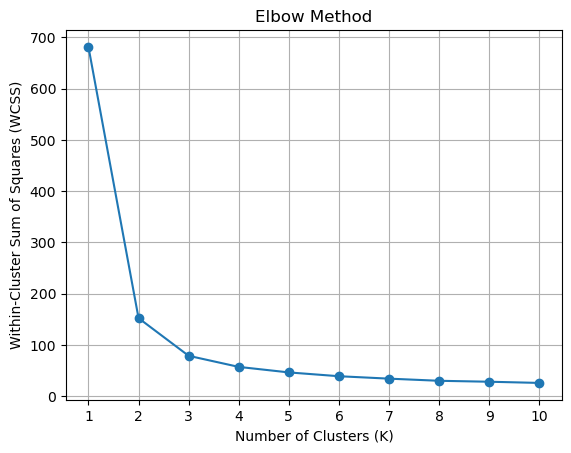

In [11]:
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_values)
plt.grid()
plt.show()

**Step 5:** Apply the best K for your k-means clustering

In [12]:
best_k = 2



**Step 6:** Visualize the clusters. Name the clusters accordingly, and also plot the centriods.


C:\Users\Asus\anaconda3\envs\python-dscourse\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\anaconda3\envs\python-dscourse\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


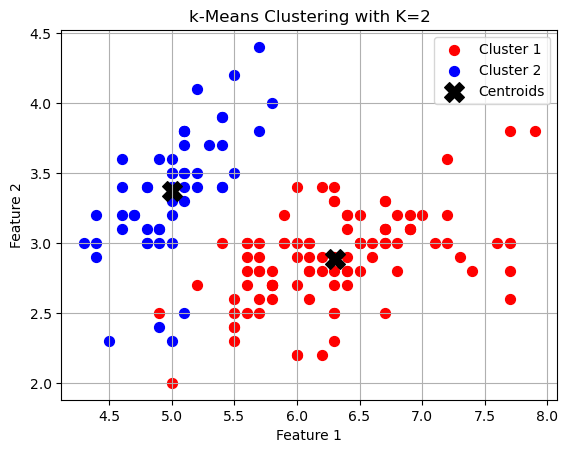

In [13]:
# Perform k-Means clustering with the chosen K value
kmeans = KMeans(n_clusters=best_k, init='k-means++', random_state=42)
kmeans.fit(X)

# Get cluster assignments for each data point
labels = kmeans.labels_

# Visualize the clusters by plotting the data points with different colors for each cluster
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s=50, c='blue', label='Cluster 2')

# Plotting the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.title('k-Means Clustering with K=2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()

### Additional/Optional:

**Step 7:** Plot the actual and Predicted side by side

In [16]:
len(y_kmeans)
len(y)
# df = pd.DataFrame({'Predictied':y_kmeans,'Actual':y}).reset_index(drop=True)
# df

150